In [1]:
import requests
import os
import pandas as pd

In [2]:
os.getcwd()

'/content'

In [3]:
#https://d3c33hcgiwev3.cloudfront.net/XFFOU75NSv2RTlO-TQr95Q_8cdc7fb4d8d247498baafe67a973fea5_sherlock-holmes.txt?Expires=1631664000&Signature=NgWd~F-l3YdVexZN-JQ-4X~vI9ZirvElt8yDyOAbfi9R~I9KcviSJJxwMWZQufVScQBxzmGBnjDCrXx506Wjss7rGYsKPZ3USEJHIOSPmsHr3WFir8Z0SgBblzD3zeeCnyIfiSGPSBFtaJck9N55ZtRmPHKzTE07cCl9MMHHkUc_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A
#Download book from the link above. The book is to be used to extract all the data for a corpus file
#Book from https://www.gutenberg.org/

#Another interesting read - https://medium.com/merantix/applying-deep-learning-to-real-world-problems-ba2d86ac5837

from google.colab import files
uploaded = files.upload()

Saving sherlock-holmes.txt to sherlock-holmes (1).txt


In [4]:
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

saved file sherlock-holmes.txt


In [5]:
os.listdir('/content/')

['.config',
 'sherlock-holmes-annotations.csv',
 'sherlock-holmes.txt',
 'sherlock-holmes (1).txt',
 'sample_data']

EXPLORATORY DATA ANALYSIS PROCESS

is the process of analyzing data sets to create summaries and visualizations of the data. These summaries and visualizations are then used to guide the use of the data for solving business challenges.  

This could involve parsing JSON, manipulating SQL queries, reading CSV, cleaning a corpus of text, sifting through images, and so much more. One common goal of this part of the process is the creation of one or more pandas dataframes or NumPy arrays that will be used for initial exploratory data analysis (EDA).  

Sometimes we need to perform a little EDA in order to determine how to best clean the data so these two steps are not necessarily mutually exclusive. Visualization, basic hypothesis testing and simple feature engineering are among the most important tasks for EDA at this stage. An minimal example of a EDA plot is one where we look at the average number of words per sentence for the name mentions.  

In [6]:
text = requests.get('https://www.gutenberg.org/files/1661/1661-0.txt').text
with open("sherlock-holmes.txt", "w") as text_file:
    text_file.write(text)

In [7]:
# Make sure sherlock-holmes.txt is in the current working directory
text = open('sherlock-holmes.txt', 'r').read()

In [8]:
import re
stop_pattern = '\.|\?|\!'
sentences = re.split(stop_pattern, text)
sentences = [re.sub("\r|\n"," ",s.lower()) for s in sentences]

DATA LABELLING OR ANNOTATION

Next, let’s stage the data in an environment where we can perform EDA. Let’s assume that we’ve already gone through the texts and annotated them according to whether sentences were about Mr. Holmes or Dr. Watson. These annotations are stored in a .csv (sherlock-holmes-annotations.csv) that you can download using the link below. From here, you can create a pandas dataframe that contains the texts and those annotations.

Download file from https://d3c33hcgiwev3.cloudfront.net/IoB_x34lRAGAf8d-JXQBxQ_237903fe00ed4bc4b2f65100f0073048_sherlock-holmes-annotations.csv?Expires=1631664000&Signature=RrbP~ouiOp-bt0ZI5TpA9UyNsshGwIp6iherWaD73j-wnDwNFPp5kRZqLy~xtjxscISMd1G9u0P3sjSI2dsfc-QywgicYMEnArtnWapP8VLHddYx-fpX5vcf7vF7z~eM-0FUNQL5niz9r8ewsG-CkJHZCgovj9I7EKydIZ~u9fo_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A

In [13]:
from google.colab import files
uploaded = files.upload()

Saving sherlock-holmes-annotations.csv to sherlock-holmes-annotations.csv


In [14]:
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

saved file sherlock-holmes-annotations.csv


In [16]:
import pandas as pd
df = pd.read_csv('sherlock-holmes-annotations.csv')
df['text'] = sentences
df.head()

,has_sherlock,has_watson,text
0,False,False,ï»¿the project gutenberg ebook of the adventur...
1,False,False,"you may copy it, give it away or re-use it un..."
2,False,False,gutenberg
3,False,False,org
4,False,False,"if you are not located in the united states, ..."


In [36]:
df['num_words'] = df['text'].apply(lambda x: len(x.split(" ")))
df.head()

,has_sherlock,has_watson,text,labels,num_words
10,True,False,the five orange pips vi,1.0,13
21,True,False,in his eyes she eclipses and predominates the...,1.0,13
23,True,False,"all emotions, and that one particularly, were...",1.0,17
28,True,False,"grit in a sensitive instrument, or a crack in...",1.0,31
40,False,True,"to me, who knew his every mood and habit, his...",2.0,18


In [39]:
df[df['has_watson'] == True]['text']

40       to me, who knew his every mood and habit, his...
44                            his manner was not effusive
130      it is the german who is so uncourteous to his...
157      boots which extended halfway up his calves, a...
270      she has the face of the most beautiful of wom...
                              ...                        
7163     you were chosen, doubtless, as resembling her...
7193                    â  âyou have done well indeed
7210                         â  âthrough the skylight
7222                                       âyou villain
7280     fowler being a persevering man, as a good sea...
Name: text, Length: 156, dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


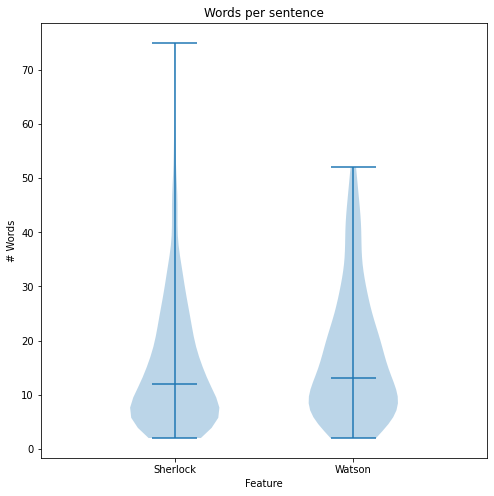

In [24]:
import matplotlib.pyplot as plt

## make eda plot
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
data1 = df[df['has_sherlock']==True]
data2 = df[df['has_watson']==True]

data = [df[df[col]==True]['num_words'].values for col in ['has_sherlock','has_watson']]

pos = [1,2]
ax1.violinplot(data, pos, points=40, widths=0.5,showextrema=True, showmedians=True)

labels = ['Sherlock', 'Watson']
ax1.set_xticks(np.arange(1, len(labels) + 1))
ax1.set_xticklabels(labels)
ax1.set_xlim(0.25, len(labels) + 0.75)
ax1.set_xlabel('Feature')
ax1.set_ylabel('# Words')
ax1.set_title("Words per sentence")

plt.show()

IDEATE 

Sometimes we need to perform a little EDA in order to determine how to best clean the data so these two steps are not necessarily mutually exclusive. Visualization, basic hypothesis testing and simple feature engineering are among the most important tasks for EDA at this stage. An minimal example of a EDA plot is one where we look at the average number of words per sentence for the name mentions.  

Now that you have clean data the data processing must continue until you are ready to input your data into a model. This stage contains all of the possible data manipulations you might perform before modeling. Perhaps the data need to be log transformed, standardized, reduced in dimensionality, kernel transformed, engineered to contain more features or transformed in some other way.

For our text data we would likely want to dig into the sentences themselves to make sure they fit the desired use case. If we were building a chatbot to engage with in a very Holmes manner then we would likely want to remove any sentences that were not said by Mr. Holmes, but his name was mentioned. If we were building a predictive model to determine which story a phrase would most likely have been generated, we would need to create a new column in our data frame representing the books themselves.

When working with text data many models that we might consider prefer a numeric representation of the data. This may be occurrences, frequencies, or another transformation of the original data. It is in this stage that these types of transformations are readied or carried out. For example here we import the necessary transformers for usage in the next stage.  

In [25]:
import numpy as np

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

# extract the data to be used in the model from the df
labels = np.zeros(df.shape[0])
labels[(df['has_sherlock'] == True)] = 1
labels[(df['has_watson'] == True)] = 2
df['labels'] = labels
df = df[df['labels']!=0]
X = df['text'].values
y = df['labels'].values

HINT ON IDEATION PROCESS

There are a lot of ways to prepare data for different models. In some case you will not know the best transformation or series of transformations until you have run the different models and made a comparison. The concept of pipelines is extremely useful for iterating over different permutations of transformers and models. The following topics will be covered in detail during Module 3.

*   Unsupervised learning
*   Feature engineering
*   Dimension Reduction
*   Simulation
*   Missing value imputation
*   Outlier detection

This is the stage where we enumerate the advantages and disadvantages of the possible modeling solutions  

Once the transformations are carried or staged as part of some pipeline it is a valuable exercise to document what you know about the process so far. The form that this most commonly takes is a table of possible modeling strategies complete with the advantages and disadvantages of each.  

PROTOTYPE

This is the modeling stage

The data have been cleaned, processed and staged (ideally in a pipeline) for modeling. The modeling (classic statistics and machine learning) is the bread and butter of data science. This is the stage where most data scientists want to spend the majority of their time. It is where you will interface with the most intriguing aspects of this discipline.  

To illustrate the process to the end shown below is a Support Vector Machine with Stochastic gradient decent as a model. The process involves the use of a train-test split and a pipeline because we want you to be exposed from the very beginning of this course with best practices. Given this example we also see that there can be considerable overlap between the ideate and prototype stages. The overlap exists because transformations of data are generally specific to models–as you will explore which model fits the situation best you will be modifying the transformations of your data.  

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

## carry out the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                        alpha=1e-3, random_state=42,
                        max_iter=5, tol=None))
])

## train a model
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

TESTING

Testing
This is the production, testing and feedback loop stage

The model works and there are evaluation metrics to provide insight into how well it works. However, the process does not end here. Perhaps the model runs, but it is not yet in production or maybe you want to try different models and/or transformers. Once in production you might want to run some tests to determine if it will handle load or if it will scale well as the data grows. A working model with an impressive f-score does not mean it will be effective in practice. This stage is dedicated to all of the considerations that come after the initial modeling is carried out.  

It is also the stage where you will determine how best to iterate. Design thinking like data science is an iterative process. Our model performed very well (see below), possibly because Dr. Holmes and Dr. Watson are described in very different ways in the stories, but it could be something else.  

In [28]:
from sklearn import metrics

## evaluate the model performance
predicted = text_clf.predict(X_test)

print(metrics.classification_report(y_test, predicted,
      target_names=['sherlock','watson']))

              precision    recall  f1-score   support

    sherlock       0.77      0.93      0.84       175
      watson       0.14      0.04      0.06        51

    accuracy                           0.73       226
   macro avg       0.46      0.49      0.45       226
weighted avg       0.63      0.73      0.67       226



CONCLUSION

As a scientist you always want to remain skeptical about your findings until you have multiple ways to corroborate them. You will also want to always be aware of the overall goal of why you are doing the work you are doing. This example is an interesting metaphor for what can happen as a data scientist. It is possible to go down a path that may only marginally be related to the central business question. Developing a game here is not unlike using a new model for deep-learning or incorporating a new technology into your workflow—it may be fun and it may to some degree help the business case, but you need to always ask yourself is this the best way for me or my team to address the business problem? The questions your ask here are going to guide how best to iterate on the entire workflow. 

ATTENTION

This café example is meant as an illustrative tool. There are additional sanity checks, data cleaning and modeling best practices that would need to be carried out (like Grid Searching) before something like it should be used in the an actual application.  

To download the full example of the file, download from here https://d3c33hcgiwev3.cloudfront.net/fWskR1imTQGrJEdYpo0BpQ_7dfa996cd44343119ff95090d6045a3a_sherlock-holmes-cafe.py?Expires=1631664000&Signature=Yst6GxQMZ58-ZSQJXqB28YGQQDqx-WMPaN11HDsVLqymJvFc3065xGhNUjEn37dsnE5tTLHqmDp2boqtPyNKQxn~Ebla6ySqKIrIo5~ewzIziACHAV9aVTdhdb9j-hzxEfcYT0M7iM2GqfU~EOc-Q0mg5JMahuaJAP~oYpP2iRM_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A